# Project Analisis Gempa Bumi

Project ini untuk menganalisis dan visualisasi data gempa bumi yang terjadi pada daerah NTB, data gempa ini dikumpulkan dari tahun 2014 hingga 2019, kemudian dalam project ini akan membahan proses cleaning dan loading data, kemudian analisis data dengan clustering ddan clasifikasi dan kemudian visualisasi hasil.
Goal dari project ini adalah untuk memberikan informasi terkait daerah mana yang berada di NTB merupakan daerah yang rawan terhadap bencana gemap bumi.

![TEs](http://localhost:8888/view/Rajafolder/lombok_map-basic.html)

# Data Cleaning

In [1]:
#import all library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load data
df2014 = pd.read_excel (r'Data Gempa Tahun 2014.xlsx')
df2015 = pd.read_excel (r'Data Gempa Tahun 2015.xlsx')
df2016 = pd.read_excel (r'Data Gempa Tahun 2016.xlsx')
df2017 = pd.read_excel (r'Data Gempa Tahun 2017.xlsx')
df2018 = pd.read_excel (r'Data Gempa Tahun 2018.xlsx')

In [2]:
#gabungkan semua dataset
dataset = pd.concat([df2014, df2015, df2016, df2017, df2018], ignore_index=True, sort =False)

In [3]:
#merubah nama colum di dataset
dataset.columns = ['Tanggal', 'Waktu', 'Lintang', 'Bujur', 'Dept',
       'Mag']

In [4]:
#onversi tanggal
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'])

In [5]:
dataset['Tanggal'].head()

0   2014-01-01
1   2014-01-02
2   2014-01-05
3   2014-01-06
4   2014-01-07
Name: Tanggal, dtype: datetime64[ns]

In [6]:
#cleaning dan pemisahan tanggan bulan dan hari
T = pd.Series(pd. DatetimeIndex(dataset['Tanggal']).year)
B = pd.Series(pd. DatetimeIndex(dataset['Tanggal']).month)
H = pd.Series(pd. DatetimeIndex(dataset['Tanggal']).day)
t=pd.DataFrame()
t['Tahun']=T
t['Bulan']=B
t['Hari']=H

In [7]:
t['Tahun'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

In [8]:
#menggabungkan dataset dengan tanggal bulan dan tahun yag dsuddah di pisah
data = t.join(dataset)

In [9]:
print(data.head())
print(data.size)

   Tahun  Bulan  Hari    Tanggal     Waktu  Lintang   Bujur   Dept  Mag
0   2014      1     1 2014-01-01  11:35:40    -8.96  118.44  116.0  2.8
1   2014      1     2 2014-01-02  01:16:48    -8.69  115.55   81.0  3.5
2   2014      1     5 2014-01-05  12:16:03    -9.97  118.78   24.0  3.9
3   2014      1     6 2014-01-06  11:13:46   -10.34  119.34   29.0  4.3
4   2014      1     7 2014-01-07  09:06:07    -9.44  119.90   94.0  4.0
51723


In [10]:
#filter data yang tidak masuk dalam area NTB
datacleanlin = data[((data['Lintang'] < -7.6380) & (data['Lintang'] > -9.550))]
dataset = datacleanlin[((data['Bujur'] > 115.788) & (data['Bujur'] < 119.363))]
#databaru.to_csv("datagempa.csv")

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#hapus tanggal dari dataset yg kemudian akan di ganti dengan tanggal yg sudah di pisah tahun bulan dan hari
databaru = dataset.drop(['Tanggal'],axis=1)

In [12]:
databaru.size

26304

# Clustering

In [13]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

X = databaru[['Dept','Mag']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [14]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 16.68877298,   3.03802334],
       [119.15865823,   3.27443038],
       [267.52430769,   3.77153846]])

In [15]:
# Get the cluster labels
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

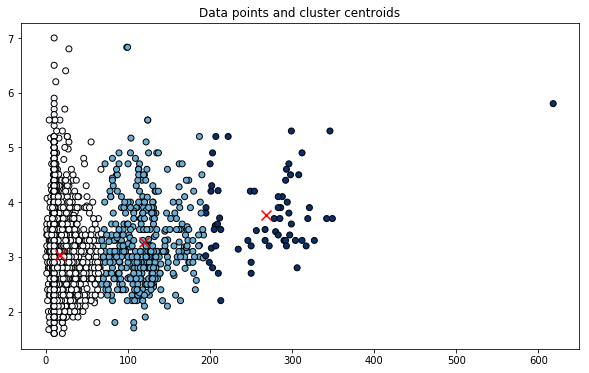

In [16]:
# Plotting the cluster centers and the data points on a 2D plane
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=kmeans.labels_,cmap="Blues", edgecolors="black")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x',s=100)
plt.title('Data points and cluster centroids')
plt.show()

In [17]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8449862385186069


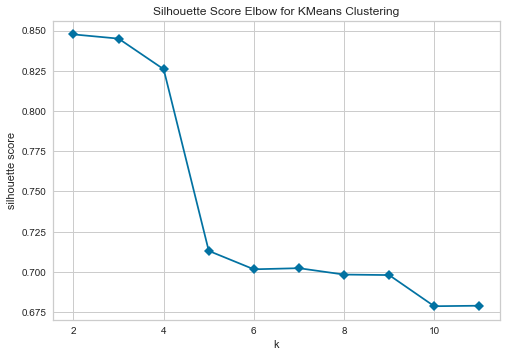

In [18]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()   

# Classification

In [ ]:
databaru.loc[(databaru['Dept'] <= 80), 'Label_Dept'] = int(0) #dangkal
databaru.loc[(databaru['Dept'] > 80) & (databaru['Dept'] <= 200), 'Label_Dept'] = int(1) #menengah
databaru.loc[(databaru['Dept'] > 200), 'Label_Dept'] = int(2) #dalam

In [ ]:
databaru.describe()

In [ ]:
f= plt.subplots()
sns.heatmap(databaru.corr(),annot=True,fmt='.1f',color='green')

In [ ]:
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = databaru[['Bujur','Lintang','Tahun','Bulan','Hari','Mag','Dept']]
Y = databaru['Label_Dept']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = Y, marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(20,20), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split( X, Y, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2466, 7) (2466,)
Test set: (822, 7) (822,)


In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.97
Accuracy of GNB classifier on test set: 0.97


In [26]:
#hasil clasifikasi berupa hasil prediksi yang sesuai dengan labelnya
y_predict = gnb.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[692  18   0]
 [  0  99   0]
 [  0   4   9]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       710
         1.0       0.82      1.00      0.90        99
         2.0       1.00      0.69      0.82        13

   micro avg       0.97      0.97      0.97       822
   macro avg       0.94      0.89      0.90       822
weighted avg       0.98      0.97      0.97       822



In [27]:
#tes prediksi di bandingkan dengan hasil training
print (y_predict [0:10])
print (y_test [0:10])

[0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
1860    0.0
786     2.0
1805    0.0
4487    0.0
2551    0.0
3812    0.0
1772    0.0
5016    0.0
2577    0.0
4138    0.0
Name: Label_Dept, dtype: float64


# Visualization the earthquake Distribution by Magnitude and Dept

In [34]:
#Merubah ke bentuk string agar bisa di visualisasikan
databaru.loc[(databaru['Dept'] <= 80), 'Label_Dept'] = 'dangkal'
databaru.loc[(databaru['Dept'] > 80) & (databaru['Dept'] <= 200), 'Label_Dept'] = 'menengah'
databaru.loc[(databaru['Dept'] > 200), 'Label_Dept'] = 'dalam'

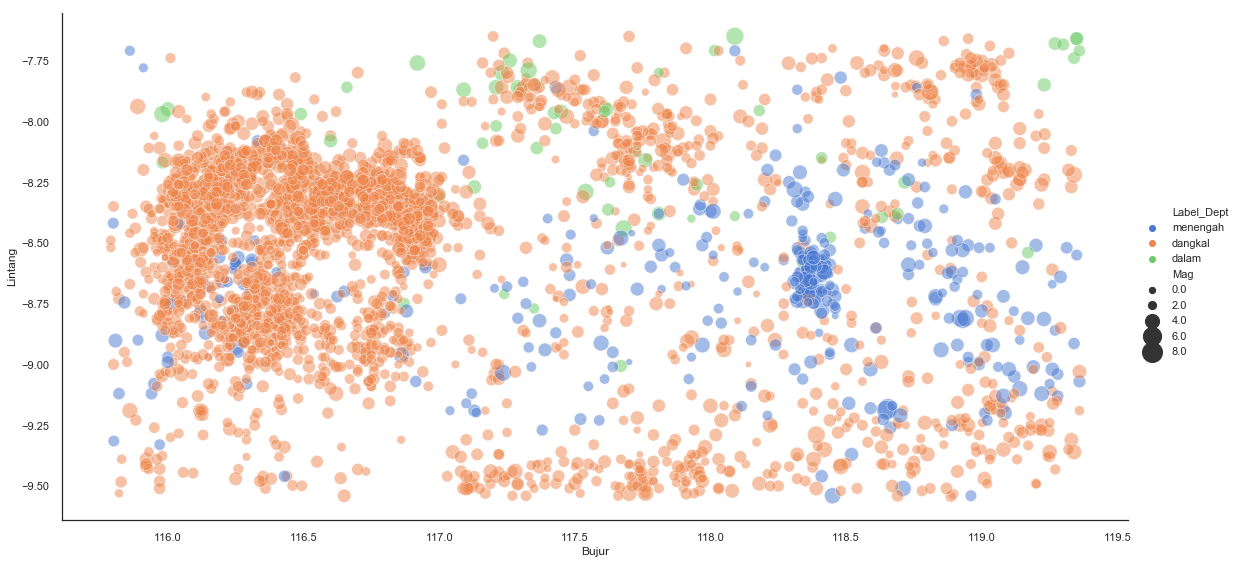

In [35]:
sns.set(style="white")

sns.relplot(x="Bujur", y="Lintang",hue="Label_Dept", size="Mag",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8,aspect=2, data=databaru)

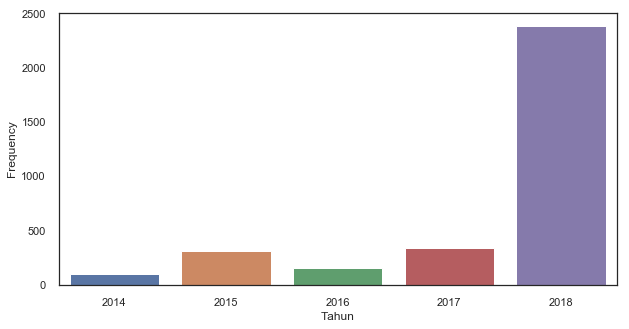

In [41]:
group_by_year = pd.DataFrame(databaru.Mag.groupby([databaru['Tahun']]).count())
group_by_year.columns = ['Frequency']

plt.figure(figsize=(10,5))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)
# by_year.set_xticklabels(by_year.get_xticklabels(),rotation=45)
#plt.savefig('yearly_eq.png')